# Housing Prices
--------------------------------------------------------------------------------------------------------------------------------

In [1]:
# Importamos las librerias Pandas y Numpy. Son bastantes populares y se utilizan
# Para la manipulación y análisis de datos

import pandas as pd
import numpy as np

In [2]:
# Se carga el archivo housing.csv en un Dataframe de pandas al que llamaremos df
# Para ello usaremos la función read_csv()

df = pd.read_csv('housing.csv')
df.head(10)

# En este caso como sabemos que el modelo puede tener alguna errata, vamos a
# Proceder a limpiar entradas que no tengan mucho sentido
# Eliminameros todas las filas si en algunos de los siguientes elementos son negativos
# 0   longitude           
# 1   latitude            
# 2   housing_median_age  
# 3   total_rooms -> no puede ser negativas         
# 4   total_bedrooms  -> no puede ser negativas    
# 5   population  -> no puede ser negativas 
# 6   households  -> no puede ser negativas      
# 7   median_income  -> no puede ser negativas 
# 8   median_house_value -> no puede ser negativas 
# 9   ocean_proximity

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
# Mostramos por pantalla el total de entradas de nuestro dataset usando la función shape()

print("Número de entradas antes de la limpieza:", df.shape[0])

# Creamos una lista que contiene los nombres de las columnas que queremos verificar

cols_to_check = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

# Iteramos por todas las columnas y nos quedamos sólo con aquellas cuyos valores
# Sean mayores que cero

for col in cols_to_check[1:]:
    df = df[df[col] >= 0]
df = df[df['longitude'] <= 0]
    
# Además, limpiamos los valores de longitud y latitud para que estén dentro de los rangos adecuados
df = df[(df['longitude'] >= -180) & (df['longitude'] <= 180)]
df = df[(df['latitude'] >= -90) & (df['latitude'] <= 90)]

# También limpiamos las filas que no contienen los valores específicos en la columna 'ocean_proximity'
valid_values = ['INLAND', '<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN']
df = df[df['ocean_proximity'].isin(valid_values)]

# Finalmente mostramos de nuevo por pantalla el número de entradas tras la limpieza
print("Número de entradas despues de la limpieza:", df.shape[0])

Número de entradas antes de la limpieza: 20640
Número de entradas despues de la limpieza: 20428


In [4]:
#Codificamos las variables cualitativas

#Mostramos todos los valores que toma la variable ocean_proximity
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN'], dtype=object)

In [5]:
# Asignamos a cada variable cualitativa, un peso

# NEAR BAY -> 1
# <1H OCEAN -> 2
# INLANDS -> 3
# NEAR OCEAN -> 4

Oceanvalues={'NEAR BAY':1,'<1H OCEAN':2,'INLAND':3,'NEAR OCEAN':4, np.nan:0}
df['ocean_proximity'] = df['ocean_proximity'].map(Oceanvalues)
df['ocean_proximity']
cols_to_check = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']

In [6]:
# Ahora procedemos a calcular las medias de las siguiente variables:
# housing_median_age  
# total_rooms        
# total_bedrooms   
# population
# households      
# median_income 
# median_house_value
# ocean_proximity

# Definimos la variable means y hacemos uso de la función mean para calcular la media de cada columna
# Por separado
# means = df[cols_to_check].mean(axis=0)

# Inicializamos una lista para guardar los valores de la media
means_list = []

# Tenemos una serie de muestras de cada variable. Como desconocemos la distribución que sigue cada
# variable, tenemos que usar las muestras. Para calcular la media muestral, sabemos que viene dada por
# X = 1/n * sum n (xi)
# Para saber cómo de buena es esta aproximación de la media poblacional a la media muestral, tenemos que 
# sacar un intervalo de confianza

# Calculamos la media de cada columna individualmente 
for col in cols_to_check:
    # Sumamos todos los valores de la columna
    col_sum = df[col].sum()
    # Contamos el número de filas totales de dicha columna
    col_count = df[col].count()
    # Calculamos la media como la suma total entre el número de filas
    col_mean = col_sum / col_count
    # Agregamos el valor obtenido a la lista previamente definida
    means_list.append(col_mean)

# Tras esto tenemos una lista con las medias de las variables anteriormente mencionadas
# Ahora calcularemos las medianas de las mismas variables, para ello:
# Inicializamos una lista para guardar las medianas
medians_list = []

# Calculamos la mediana de cada columna individualmente
for col in cols_to_check:
    # Ordenamos los valores de la columna
    sorted_values = df[col].sort_values()
    # Contamos el número total de entradas de la variable
    col_count = sorted_values.count()
    # Calculamos el índice medio
    middle_index = col_count // 2
    # Si el número de valores es impar, la mediana es el valor en el índice medio
    if col_count % 2 != 0:
        col_median = sorted_values.iloc[middle_index]
    # Si el número de valores es par, la mediana es el promedio de los dos valores en el medio
    else:
        col_median = (sorted_values.iloc[middle_index - 1] + sorted_values.iloc[middle_index]) / 2
    # Agregamos la mediana calculada a la lista de medianas
    medians_list.append(col_median)

# Ahora calcularemos los valores mínimos y máximos de cada variable, para ello:
# Inicializamos las  listas para almacenar los mínimos y máximos de cada columna
min_values = []
max_values = []

# Calculamos los mínimos y máximos de cada columna individualmente
for col in cols_to_check:
    # Calculamos el mínimo valor de la columna y lo agregamos  a la lista de mínimos usando la función min()
    min_val = df[col].min()
    min_values.append(min_val)
    
    # Calculamos el máximo valor de la columna y lo agregamos a la lista de máximos usando la función max()
    max_val = df[col].max()
    max_values.append(max_val)

# Ahora calcularemos la desviación típica de cada variable, para ello:
# Podemos hacer uso de la fórmula matemática para calcular la desviación típica, o podemos hacer uso de una 
# Función de la librería Pandas para calcularla de forma más sencilla
# Vamos a optar por esta segunda opción para que podais apreciar algunas ventajas que nos proporciona
# el uso de librerías externas
# Inicializamos una lista para almacenar las desviaciones estándar de cada columna
std_devs = []

# Calculamos las desviaciones estándar de cada columna individualmente
for col in cols_to_check:
    # Calculamos la desviacón estándar usando la función std() y la agregamos a la lista
    std_dev = df[col].std()
    std_devs.append(std_dev)

# Igual que con la mediana, aqui calculamos la varianza muestral
# Inicializar una lista para almacenar las varianzas de cada columna
variances = []

# Calcular las varianzas de cada columna individualmente
for col in cols_to_check:
    # Calcular la media de la columna
    col_mean = df[col].mean()
    # Calcular las desviaciones de cada valor respecto a la media
    deviations = df[col] - col_mean
    # Elevar al cuadrado cada desviación
    squared_deviations = deviations ** 2
    # Calcular la varianza como la media de los cuadrados de las desviaciones
    variance = squared_deviations.mean()
    # Agregar la varianza calculada a la lista
    variances.append(variance)

# Inicializamos una lista para almacenar las varianzas de cada columna
variances2 = []

# Calcular las varianzas de cada columna individualmente
# Usamos la función zip() para combinar las listas cols_to_check y std_dev
# De este modo en cada iteración del bucle for, col tomará un valor de cols_to_check
# Y std_dev tomará el valor de cada deviacón estándar de la lista std_devs
for col, std_dev in zip(cols_to_check, std_devs):
    # Elevamos al cuadrado la desviación estándar
    squared_deviation = std_dev ** 2
    # Agregamos la varianza calculada a la lista
    variances2.append(squared_deviation)

In [7]:
variances
#variances2

[4.014747015087961,
 4.563607342988449,
 158.504270199874,
 4775964.052949928,
 177591.15419376054,
 1284254.8350241117,
 146166.6504827504,
 3.6076641498922455,
 13319355589.564716,
 0.7282538730881204]

In [8]:
# Printeamos la información
for k in range (len(cols_to_check)) :
    print("\n-->", cols_to_check[k], "-> variance: ", variances[k])
    print("-->", cols_to_check[k], "-> mean: ", means_list[k])
    print("-->", cols_to_check[k], "-> std: ", std_devs[k])
    print("-->", cols_to_check[k], "-> median: ", medians_list[k], '\n')


--> longitude -> variance:  4.014747015087961
--> longitude -> mean:  -119.57098639122775
--> longitude -> std:  2.003732406356741
--> longitude -> median:  -118.5 


--> latitude -> variance:  4.563607342988449
--> latitude -> mean:  35.633778147640484
--> latitude -> std:  2.1363124194602987
--> latitude -> median:  34.26 


--> housing_median_age -> variance:  158.504270199874
--> housing_median_age -> mean:  28.629723908361072
--> housing_median_age -> std:  12.590156065238101
--> housing_median_age -> median:  29.0 


--> total_rooms -> variance:  4775964.052949928
--> total_rooms -> mean:  2636.764147248874
--> total_rooms -> std:  2185.4514086076547
--> total_rooms -> median:  2127.0 


--> total_bedrooms -> variance:  177591.15419376054
--> total_bedrooms -> mean:  537.8993048756608
--> total_bedrooms -> std:  421.4259699351803
--> total_bedrooms -> median:  435.0 


--> population -> variance:  1284254.8350241117
--> population -> mean:  1425.1322204816918
--> population -> s

In [9]:
#Matriz de covarianzas usando el comando cov
cov = df.cov()
cov

# Observamos que la matriz es simetrica y la autocovarianza coincide con la varianza (por las propiedades de la covarianza)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,4.014944,-3.957961,-2.763796,1.994872e+02,5.881635e+01,2.279404e+02,4.336312e+01,-0.058854,-1.055488e+04,0.309439
latitude,-3.957961,4.563831,0.327909,-1.718082e+02,-6.037892e+01,-2.643598e+02,-5.875775e+01,-0.323793,-3.558104e+04,-0.122675
housing_median_age,-2.763796,0.327909,158.512030,-9.922918e+03,-1.700442e+03,-4.219296e+03,-1.457132e+03,-2.826442,1.541369e+05,-2.226761
total_rooms,199.487173,-171.808250,-9922.918098,4.776198e+06,8.568872e+05,2.123227e+06,7.678660e+05,821.183953,3.367646e+07,30.378536
total_bedrooms,58.816353,-60.378915,-1700.442339,8.568872e+05,1.775998e+05,4.192107e+05,1.578582e+05,-6.217002,2.421788e+06,1.542213
population,227.940353,-264.359816,-4219.296220,2.123227e+06,4.192107e+05,1.284318e+06,3.930637e+05,10.738194,-3.278901e+06,-6.367000
households,43.363117,-58.757747,-1457.131528,7.678660e+05,1.578582e+05,3.930637e+05,1.461738e+05,9.695003,2.873512e+06,-4.944548
median_income,-0.058854,-0.323793,-2.826442,8.211840e+02,-6.217002e+00,1.073819e+01,9.695003e+00,3.607841,1.510078e+05,-0.209316
median_house_value,-10554.884838,-35581.037544,154136.900899,3.367646e+07,2.421788e+06,-3.278901e+06,2.873512e+06,151007.759387,1.332001e+10,-21018.890556
ocean_proximity,0.309439,-0.122675,-2.226761,3.037854e+01,1.542213e+00,-6.367000e+00,-4.944548e+00,-0.209316,-2.101889e+04,0.728290


In [10]:
# Matriz de covarianzas usando la fórmula teórica de la covarianza muestral: 

# Sxy = 1/(n-1)* sum n ((xi - xmedia)(yi - ymedia))
S00 = ((df['longitude'] - means_list[0]) * (df['longitude'] - means_list[0])).sum() / (len(df['longitude']) - 1)
print('Cov00 :', S00)
S55 = ((df['population'] - means_list[5]) * (df['population'] - means_list[5])).sum() / (len(df['population']) - 1)
print('Cov55 :', S55)
S04 = ((df['longitude'] - means_list[0]) * (df['total_bedrooms'] - means_list[4])).sum() / (len(df['longitude']) - 1)
print('Cov04 :', S04)

# Luego observamos que se cumple lo teórico con lo práctico

Cov00 : 4.01494355628417
Cov55 : 1284317.705481592
Cov04 : 58.816352914928515


In [11]:
#Correlación usando el comando corr
corr = df.corr()
corr

# Observamos que cuando la correlacion es negativa, dependencia es negativa y vicecersa.
# La correlacion esta acotada entre -1 y 1, siendo 1 una fuerte dependecia positiva y -1 una fuerte dependencia negativa

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924628,-0.109556,0.045555,0.069653,0.100380,0.056604,-0.015464,-0.045642,0.180960
latitude,-0.924628,1.000000,0.012192,-0.036799,-0.067066,-0.109193,-0.071939,-0.079796,-0.144312,-0.067288
housing_median_age,-0.109556,0.012192,1.000000,-0.360634,-0.320486,-0.295715,-0.302714,-0.118191,0.106077,-0.207248
total_rooms,0.045555,-0.036799,-0.360634,1.000000,0.930382,0.857273,0.918987,0.197822,0.133516,0.016288
total_bedrooms,0.069653,-0.067066,-0.320486,0.930382,1.000000,0.877758,0.979740,-0.007767,0.049792,0.004288
population,0.100380,-0.109193,-0.295715,0.857273,0.877758,1.000000,0.907177,0.004989,-0.025069,-0.006583
households,0.056604,-0.071939,-0.302714,0.918987,0.979740,0.907177,1.000000,0.013350,0.065122,-0.015154
median_income,-0.015464,-0.079796,-0.118191,0.197822,-0.007767,0.004989,0.013350,1.000000,0.688848,-0.129130
median_house_value,-0.045642,-0.144312,0.106077,0.133516,0.049792,-0.025069,0.065122,0.688848,1.000000,-0.213405
ocean_proximity,0.180960,-0.067288,-0.207248,0.016288,0.004288,-0.006583,-0.015154,-0.129130,-0.213405,1.000000


In [12]:
#Correlación usando la fórmula teórica: r = Cov(x, y) / (std(x) * std(y))
corr00 = cov.iloc[0, 0] / (std_devs[0] * std_devs[0])
print('Corr[0,0]:', corr00)

corr56 = cov.iloc[5, 6] / (std_devs[5] * std_devs[6])
print('Corr[5,6]:', corr56)

# Luego observamos que concuerda lo teórico con lo práctico

Corr[0,0]: 1.000000000000003
Corr[5,6]: 0.9071766646579043


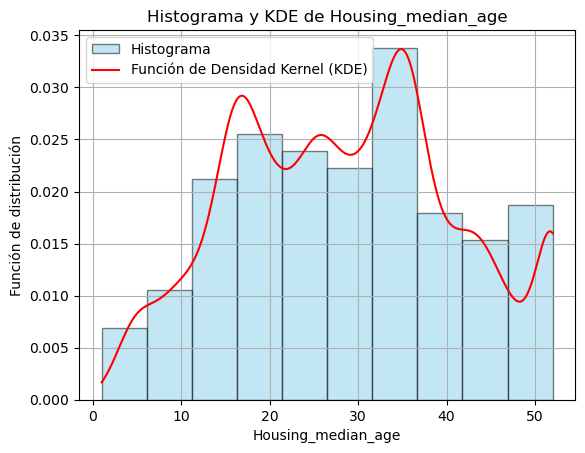

Área del histograma =  1.0 , luego verifica que es una funcion de densidad


In [13]:
# Podemos calcular la función de densidad de por ejemplo la edad media de los edificos

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Datos de ejemplo (edad media de los edificios)
edades_edificios = df['housing_median_age']

# Crear la función de densidad kernel (KDE)
kde = gaussian_kde(edades_edificios)

# La KDE suaviza el histograma de los datos, proporcionando una estimación continua 
# de la función de densidad de probabilidad. La suavidad de la KDE está controlada 
# por un parámetro de ancho de banda, que determina cuánto se suavizan los datos. 
# Un ancho de banda más pequeño produce una estimación más detallada pero más ruidosa
# mientras que un ancho de banda más grande produce una estimación más suave pero menos detallada
# Basicamente hacer una interpolacion

# Calcular los puntos para graficar la función de densidad
x = np.linspace(min(edades_edificios), max(edades_edificios), 1000)
y = kde(x)

# Graficar el histograma y la función de densidad
hist, bins = np.histogram(edades_edificios, bins=10, density=True)
plt.hist(edades_edificios, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.5, label='Histograma')
plt.plot(x, y, color='red', label='Función de Densidad Kernel (KDE)')
plt.title('Histograma y KDE de Housing_median_age')
plt.xlabel('Housing_median_age')
plt.ylabel('Función de distribución')
plt.legend()
plt.grid(True)
plt.show()

# Calcular el ancho de cada barra del histograma
widths = np.diff(bins)

# Calcular el área total del histograma
area_histograma = np.sum(hist * widths)

print("Área del histograma = ", area_histograma, ", luego verifica que es una funcion de densidad")

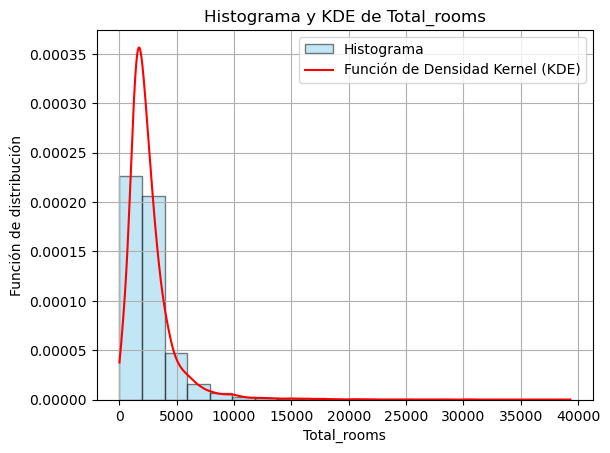

Área del histograma =  1.0 , luego verifica que es una funcion de densidad


In [14]:
# Podemos calcular la función de densidad de por ejemplo el numero total de habitaciones

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Datos de ejemplo (edad media de los edificios)
edades_edificios = df['total_rooms']

# Crear la función de densidad kernel (KDE)
kde = gaussian_kde(edades_edificios)

# La KDE suaviza el histograma de los datos, proporcionando una estimación continua 
# de la función de densidad de probabilidad. La suavidad de la KDE está controlada 
# por un parámetro de ancho de banda, que determina cuánto se suavizan los datos. 
# Un ancho de banda más pequeño produce una estimación más detallada pero más ruidosa
# mientras que un ancho de banda más grande produce una estimación más suave pero menos detallada
# Basicamente hacer una interpolacion

# Calcular los puntos para graficar la función de densidad
x = np.linspace(min(edades_edificios), max(edades_edificios), 1000)
y = kde(x)

# Graficar el histograma y la función de densidad
hist, bins = np.histogram(edades_edificios, bins=10, density=True)
plt.hist(edades_edificios, bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.5, label='Histograma')
plt.plot(x, y, color='red', label='Función de Densidad Kernel (KDE)')
plt.title('Histograma y KDE de Total_rooms')
plt.xlabel('Total_rooms')
plt.ylabel('Función de distribución')
plt.legend()
plt.grid(True)
plt.show()

# Calcular el ancho de cada barra del histograma
widths = np.diff(bins)

# Calcular el área total del histograma
area_histograma = np.sum(hist * widths)

print("Área del histograma = ", area_histograma, ", luego verifica que es una funcion de densidad")